In [400]:
import os
import numpy as np
from matplotlib import pyplot

In [401]:
# Leer datos
data = np.loadtxt('dataset.txt', delimiter=',')
X, y = data[:, 0], data[:,1]
m = y.size

In [402]:
m
# for i in X : print(i[0])

1111

In [403]:
def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel('Tasa de Natalidad')
  pyplot.ylabel('Tasa de Mortalidad')

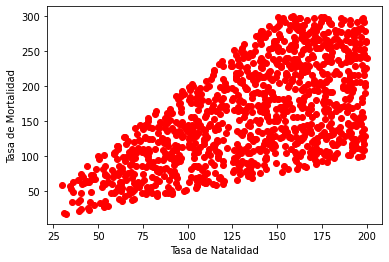

In [404]:
graficarDatos(X, y)

In [405]:
# No olvidarse agregar unos a la matriz de x
X = np.stack([np.ones(m), X], axis=1)

In [406]:
X

array([[  1.        ,  82.87578544],
       [  1.        ,  68.68049223],
       [  1.        , 171.50839521],
       ...,
       [  1.        , 161.25781916],
       [  1.        , 129.45269572],
       [  1.        , 105.7249364 ]])

In [407]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  # h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [408]:
theta=np.array([0.1, 2.8])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 2.8] se obtiene un costo de: 28023.849421505678


In [409]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [410]:
theta = np.zeros(2)
# print(theta)
num_ite = 81
alpha = 0.003
with np.errstate(divide="ignore"):
  theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [1.15055272e+141 1.70210481e+143]
con un costo de: 2.8751125161172544e+290 


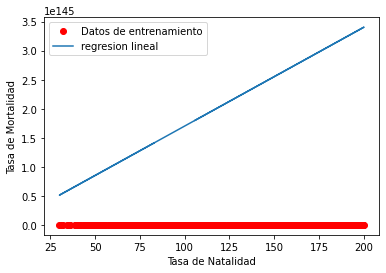

In [411]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [414]:
y_pred = np.dot([1, 18.3], theta)
print(y_pred)

1.7022198632252706e+145


In [413]:
# import random
# x_min, x_max = 30.0, 200.0 
# y_min, y_max = 10.0, 300.0
# archivo = open('datos.txt','w')
# for i in range(2000):
#   x = random.uniform(x_min, x_max)
#   y = random.uniform(y_min, y_max)
#   # archivo.write(x%','%y)
#   # archivo.write()
#   x2 = x/2
#   y2 = y/2
#   max = x if x>=y else y
#   min = x if x<=y else y
#   max2 = max/2
#   if min >= max2:
#     print(f'{x},{y}')
